In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install statsmodels

     |████████████████████████████████| 16.8 MB 6.2 MB/s eta 0:00:01
You should consider upgrading via the '/home/gitpod/.pyenv/versions/3.8.12/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 11.7 MB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 503 kB 108.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/gitpod/.pyenv/versions/3.8.12/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 11.3 MB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 89.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 96.2 MB/s eta 0:00:01
     |████████████████████████████████| 890 kB 101.2 MB/s eta 0:00:01
You should consider upgrading via the '/home/gitpod/.pyenv/versions/3.8.12/bin/python -m pip install --upgrade pip' command.
Note: yo

In [19]:
import matplotlib as mpl
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['figure.figsize'] = (20, 10)


In [3]:
import numpy as np
import pandas as pd

In [4]:
airline = pd.read_csv("./UDEMY_TSA_FINAL/Data/airline_passengers.csv",index_col=0,parse_dates=True)

In [5]:
airline.dropna()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [6]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

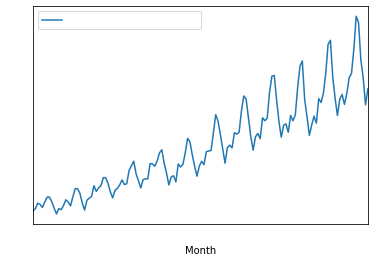

In [7]:
airline.plot()

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
result = seasonal_decompose(airline['Thousands of Passengers'],model='multiplicative')

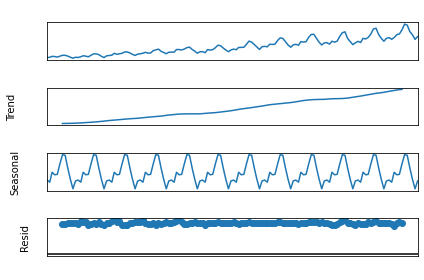

In [10]:
result.plot();

In [11]:
airline['Thousands of Passengers']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Thousands of Passengers, Length: 144, dtype: int64

In [12]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [13]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()

In [14]:
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [15]:
airline.tail()

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1960-08-01,606,519.166667,463.333333
1960-09-01,508,534.000000,467.083333
1960-10-01,461,534.000000,471.583333
1960-11-01,390,520.333333,473.916667
1960-12-01,432,503.166667,476.166667


<AxesSubplot:xlabel='Month'>

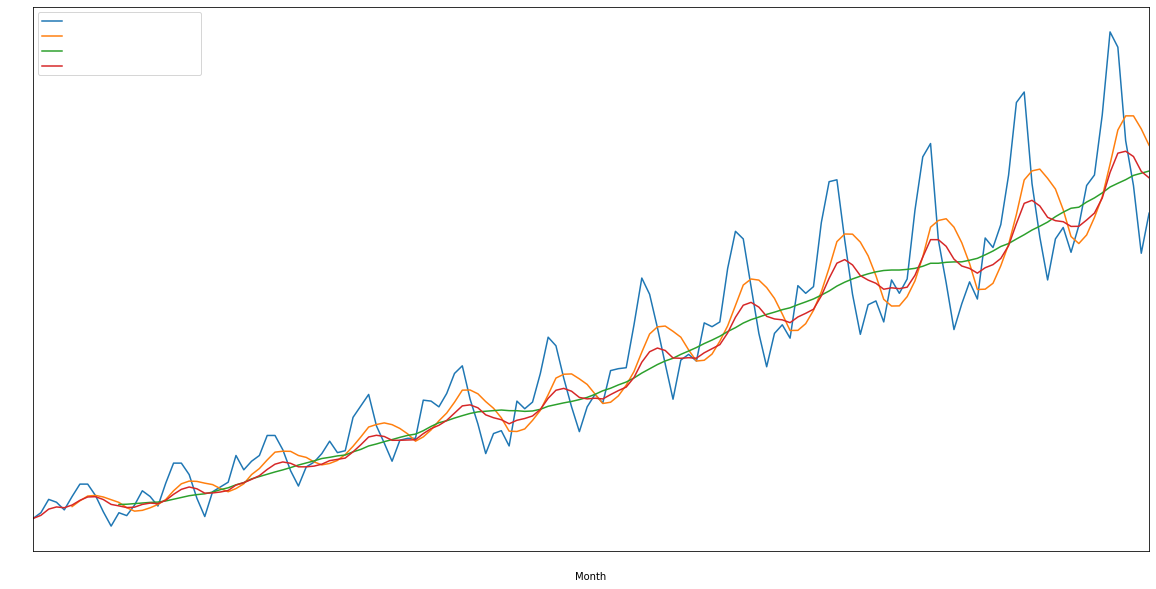

In [22]:
airline.plot()

In [21]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

<AxesSubplot:xlabel='Month'>

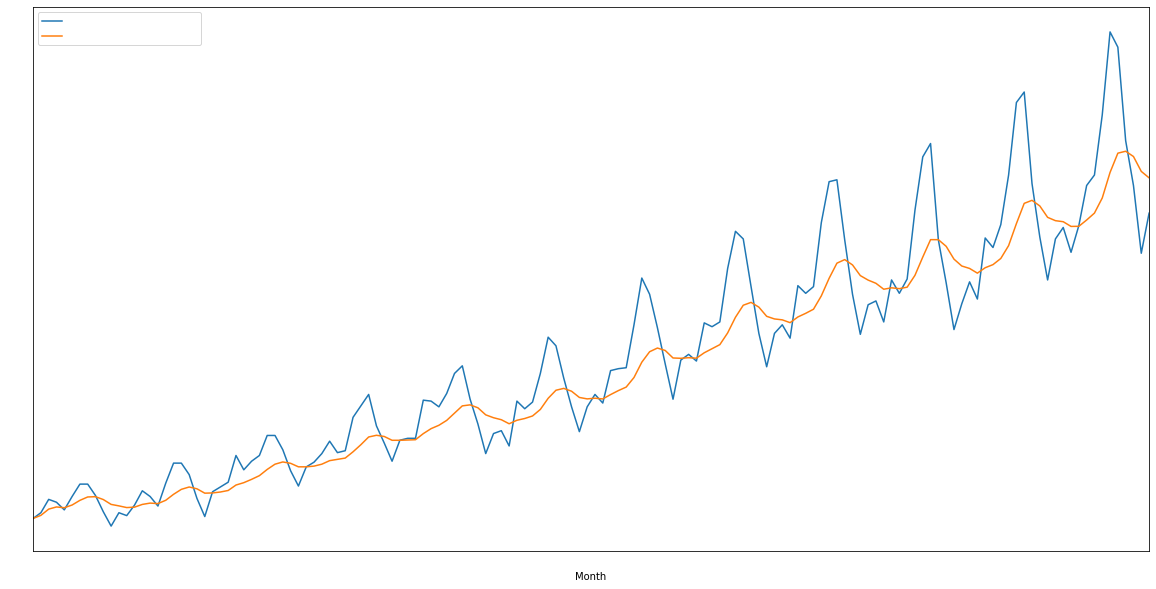

In [20]:
airline[['Thousands of Passengers','EWMA-12']].plot()